Plot Marcia's measurements of backgrounds in her GTO field, versus predictions from JBT.  May want to include in backgrounds paper

In [1]:
import glob
import jrr
import matplotlib.pyplot as plt
import matplotlib
import pandas

In [7]:
PID = '1180'
observtns = (25, 26, 27, 28, 29)
bkg_df = {}
for thisobs in observtns:
    bkg_df[thisobs] = jrr.jwst.open_background_file('pid1180_obsvn' + str(thisobs) + '.txt')

In [3]:
bkg_df[thisobs].head()

,wave,total,zody,Gal,straylight,thermal
0,0.5,0.1729,0.1503,0.0015,0.0210,0.0
1,0.6,0.2351,0.1987,0.0021,0.0343,0.0
2,0.7,0.2627,0.2230,0.0027,0.0370,0.0
3,0.8,0.2725,0.2302,0.0033,0.0390,0.0
4,0.9,0.2696,0.2261,0.0038,0.0396,0.0


In [4]:
# Translate filter names to approx wavelengths
filter_wave   = jrr.jwst.getwave_for_filter()
data_df = pandas.read_csv("marcia_backgrounds_PID110.txt", delim_whitespace=True, comment='#')
data_df['wave'] = data_df.filtname.map(filter_wave)
data_df.head()

,filtname,detector,sb,unc,wave
0,F090W,NRCA2,0.186,0.008,0.902
1,F115W,NRCA2,0.205,0.008,1.154
2,F150W,NRCA2,0.199,0.007,1.501
3,F200W,NRCA2,0.155,0.007,1.989
4,F277W,NRCALONG,0.092,0.003,2.762


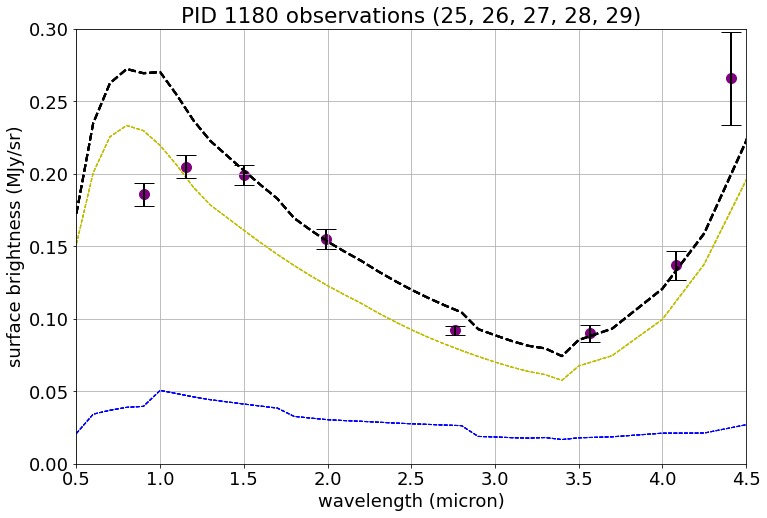

In [11]:
plt.rcParams['figure.figsize'] = [12, 8]
matplotlib.rcParams.update({'font.size': 18})

scale_straylight=1.0

for thisobs in observtns:
    jrr.jwst.plot_expected_bkgs(bkg_df[thisobs], scalestray=scale_straylight, plotlegend=False, plotthermal=False)
plt.scatter(data_df.wave, data_df.sb, s=100, color='purple')
plt.errorbar(data_df.wave, data_df.sb, yerr=data_df.unc, color='k', ls='none', capsize=10, lw=2)
plt.ylim(0.0, 0.3)
plt.xlim(0.5,4.5)
plt.grid(visible=True)
plt.xlabel("wavelength (micron)")
plt.ylabel("surface brightness (MJy/sr)")
plt.title("PID " + PID + " observations " + str(observtns))
plt.savefig('marcia_PID1449.png')